In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

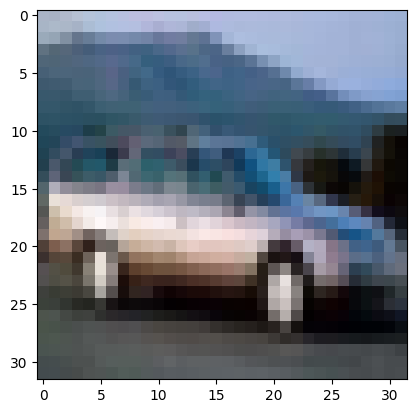

In [4]:
plt.imshow(X_train[4])

In [38]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
def plot_sample(x, y, index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [7]:
y_train = y_train.reshape(-1, )

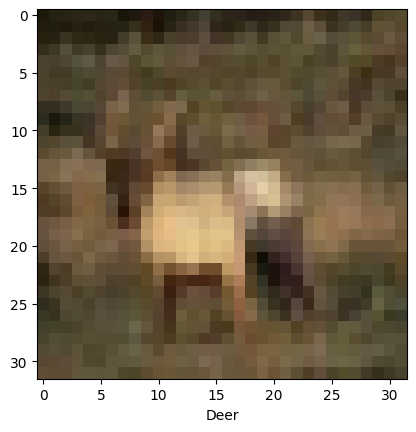

In [8]:
plot_sample(X_train, y_train, 3)

In [9]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [10]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'), 
    layers.Dense(1500, activation = 'relu'), 
    layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
ann.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.8099 - accuracy: 0.3566
Epoch 2/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6231 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5398 - accuracy: 0.4571
Epoch 4/5
1563/1563 [==============================] - 35s 23ms/step - loss: 1.4788 - accuracy: 0.4802
Epoch 5/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4309 - accuracy: 0.4973


In [34]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, activation = 'relu', kernel_size = (3, 3), input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(10, activation = 'Softmax')
])

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [35]:
cnn.fit(X_train_scaled, y_train, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6027 - accuracy: 0.4097
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2166 - accuracy: 0.5655
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0748 - accuracy: 0.6212
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9862 - accuracy: 0.6534
Epoch 5/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9181 - accuracy: 0.6768
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8604 - accuracy: 0.6969
Epoch 7/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8116 - accuracy: 0.7168
Epoch 8/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7719 - accuracy: 0.7280
Epoch 9/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7363 - accuracy: 0.7416
Epoch 10/20
1563/1563 [==============================] - 13s 9ms/step - l

313/313 [==============================] - 2s 4ms/step - loss: 0.9610 - accuracy: 0.7109


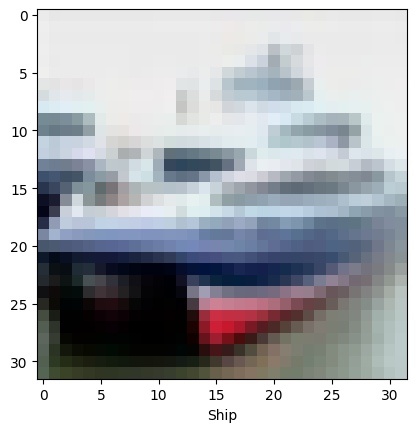

In [36]:
cnn.evaluate(X_test_scaled, y_test)
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [37]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(ele) for ele in y_pred]
y_classes[:5]
classes[y_classes[1]]

313/313 [==============================] - 1s 4ms/step


'Ship'

In [14]:
from PIL import Image
hen = Image.open(r"C:\Users\yasar\Downloads\hen.jpg")
hen_data = np.array(hen)
hen_data.shape

(32, 32, 3)

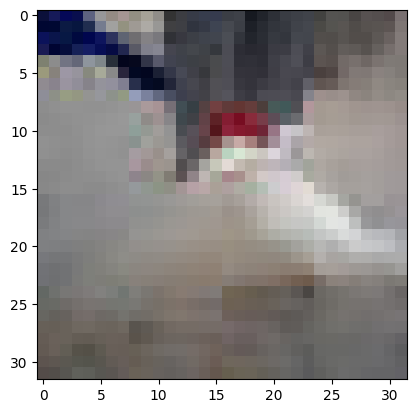

In [15]:
plt.imshow(hen)

In [28]:
hen_data_scaled = hen_data/255
hen_data_scaled_0 = np.array([hen_data_scaled])

In [29]:
hen_data_scaled.shape, hen_data_scaled_0.shape

((32, 32, 3), (1, 32, 32, 3))

In [30]:
pred = cnn.predict(hen_data_scaled_0)

1/1 [==============================] - 0s 120ms/step


In [33]:
classes[np.argmax(pred)]

'Bird'